# Análise Exploratória do Conjunto de Dados 'Crab Age Prediction'.
## Investigação das Características Físicas de Caranguejos na Região de Boston para Identificação de Insights sobre o Peso Descascado.

O objetivo deste trabalho é realizar uma análise abrangente sobre um conjunto de dados que contém informações sobre características físicas de caranguejos de Boston. Para atingir esse objetivo, as etapas principais incluem a limpeza e o tratamento dos dados, visando garantir a qualidade e a consistência das informações. Em seguida, será realizada uma análise exploratória detalhada, que envolve a identificação de padrões, tendências e relações entre as variáveis presentes no conjunto de dados. Um foco especial será direcionado para a busca de insights relacionados às características dos carangueijos que apresentam maior peso descascado, aspecto crucial tanto para o entendimento da biologia desses organismos quanto para a sua comercialização. Ao explorar e interpretar os dados de forma minuciosa, buscamos obter uma compreensão mais profunda das características que influenciam o peso descascado dos carangueijos, proporcionando insights valiosos para diversas aplicações, desde a gestão da pesca até o desenvolvimento de estratégias de marketing.

### Importação
Bibliotecas utilizadas

In [1]:
try:
    import pandas as pd
except ImportError:
    %pip install pandas
    import pandas as pd

try:
    import numpy as np
except ImportError:
    %pip install numpy
    import numpy as np

try:
    import zipfile
except ImportError:
    %pip install zipfile
    import zipfile

try:
    import kaggle
except ImportError:
    %pip install kaggle
    import kaggle

try:
    import seaborn as srn
except ImportError:
    %pip install seaborn
    import seaborn as srn

try:
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

from IPython.display import Markdown

Banco de dados utilizado
<br>
https://www.kaggle.com/datasets/sidhus/crab-age-prediction/data

In [2]:
# Download do dataset via api kaggle no diretorio de trabalho, este script só funciona caso suas credenciais do kaggle estejam no diretório específico da biblioteca
#!kaggle datasets download -d sidhus/crab-age-prediction

In [3]:
# Descompactando o .zip 
#dataset = "./crab-age-prediction.zip"

#with zipfile.ZipFile(dataset, 'r') as zip_ref:
#    zip_ref.extractall("./")

In [4]:
# Carregando o arquivo csv do diretório local
df = pd.read_csv("./CrabAgePrediction.csv")
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
...,...,...,...,...,...,...,...,...,...
3888,F,1.4625,1.1375,0.3250,24.819987,11.651644,5.854172,6.378637,8
3889,F,1.5500,1.2125,0.4375,34.458817,15.450477,7.172423,9.780577,10
3890,I,0.6250,0.4625,0.1625,2.012815,0.765436,0.524466,0.637864,5
3891,I,1.0625,0.7750,0.2625,10.347568,4.507570,2.338834,2.976698,6


In [34]:
# Verificando os tipos de dados das colunas
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

* Os tipos das variáveis estão dentro do esperado

### Descrição das variáveis do dataset


In [6]:
variaveis = df.columns
novo_nome = ["sexo",
                "comprimento_cm", 
                "diametro_cm", 
                "altura_cm",
                "peso_gramas",
                "peso_descascado_gramas",
                "peso_visceral_gramas",
                "peso_casca_gramas",
                "idade_meses"]
                
# Create a multiline string with HTML line breaks
table_content = f'''\
| Nome variável original   | Descrição                    | Nome variável que utilizaremos |
| ------------- | --------------------------------------- | -------------- |
| {variaveis[0]}  | Sexo (Masculino, feminino ou indeterminado)| {novo_nome[0]} |
| {variaveis[1]}  | Comprimento em pés     | {novo_nome[1]} |
| {variaveis[2]}  | Diâmetro em pés        | {novo_nome[2]} |
| {variaveis[3]}  | Altura em pés          | {novo_nome[3]} |
| {variaveis[4]}  | Peso total em onças   | {novo_nome[4]} |
| {variaveis[5]}  | Peso descascado em onças  | {novo_nome[5]} |
| {variaveis[6]}  | Peso das vísceras em onças  | {novo_nome[6]} |
| {variaveis[7]}  | Peso da casca em onças  | {novo_nome[7]} | 
| {variaveis[8]}  | Idade em meses             | {novo_nome[8]} |
'''

# Display the Markdown-formatted table
Markdown(table_content)

| Nome variável original   | Descrição                    | Nome variável que utilizaremos |
| ------------- | --------------------------------------- | -------------- |
| Sex  | Sexo (Masculino, feminino ou indeterminado)| sexo |
| Length  | Comprimento em pés     | comprimento_cm |
| Diameter  | Diâmetro em pés        | diametro_cm |
| Height  | Altura em pés          | altura_cm |
| Weight  | Peso total em onças   | peso_gramas |
| Shucked Weight  | Peso descascado em onças  | peso_descascado_gramas |
| Viscera Weight  | Peso das vísceras em onças  | peso_visceral_gramas |
| Shell Weight  | Peso da casca em onças  | peso_casca_gramas | 
| Age  | Idade em meses             | idade_meses |


### Tratamentos 

 Alteração dos nomes das colunas e unidades
 <br>
1 pé = 30,48 cm
<br>
1 onça = 28,35 g

In [7]:
# Renomeando os nomes das  colunas
df2 = df.rename(columns=dict(zip(df.columns, novo_nome)))


onca_g = 28.35   #conversão de onças para gramas
pes_cm = 30.48   #conversão de pés para centimetros

# Convertendo para unidades brasileiras
df2 = df2.assign(
    comprimento_cm=lambda x: x['comprimento_cm'] * pes_cm,
    diametro_cm=lambda x: x['diametro_cm'] * pes_cm,
    altura_cm=lambda x: x['altura_cm'] * pes_cm,
    peso_gramas=lambda x: x["peso_gramas"] * onca_g,
    peso_descascado_gramas=lambda x: x["peso_descascado_gramas"] * onca_g,
    peso_visceral_gramas=lambda x: x["peso_visceral_gramas"] * onca_g,
    peso_casca_gramas=lambda x: x["peso_casca_gramas"] * onca_g
)
df2

,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
0,F,43.815,35.814,12.573,698.422534,349.613121,158.330540,191.282581,9
1,M,27.051,19.812,6.477,153.106436,65.100374,38.979854,44.203958,6
2,I,31.623,23.622,7.620,225.440185,91.622749,45.409520,78.361562,6
3,F,35.814,27.051,7.620,382.163309,134.621144,64.698520,148.686040,10
4,I,27.051,20.193,6.477,195.702977,98.052416,42.194687,48.222500,6
...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,703.646639,330.324122,165.965769,180.834373,8
3889,F,47.244,36.957,13.335,976.907469,438.021037,203.338206,277.279372,10
3890,I,19.050,14.097,4.953,57.063291,21.700125,14.868604,18.083437,5
3891,I,32.385,23.622,8.001,293.353539,127.789624,66.305937,84.389374,6


### Estatisticas descritivas

In [8]:
# Chamando a função que nos mostra as estatísticas
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comprimento_cm,3893.0,39.968593,9.157125,5.715000,34.290000,41.529000,46.863000,62.103000
diametro_cm,3893.0,31.116827,7.566132,4.191000,26.670000,32.385000,36.576000,49.530000
altura_cm,3893.0,10.648916,3.199676,0.000000,8.763000,11.049000,12.573000,86.106000
peso_gramas,3893.0,668.132248,393.815540,1.607417,359.257621,646.181493,929.488678,2270.877872
peso_descascado_gramas,3893.0,289.378145,177.904037,0.803708,151.499019,270.447851,404.667142,1195.917988
peso_visceral_gramas,3893.0,145.621089,88.002173,0.401854,75.548583,137.835978,204.141915,610.818327
peso_casca_gramas,3893.0,192.662181,111.795154,1.205562,105.285791,188.871456,265.223747,807.726867
idade_meses,3893.0,9.954791,3.220967,1.000000,8.000000,10.000000,11.000000,29.000000


Uma primeira análise das estatísticas descritivas nos permite identificar que:
* Há pelo menos uma observação da variável altura com valor igual a 0.
* As variáveis de peso possuem um elevado desvio padrão, indicando uma considerável dispersão em torno da média. Isso sugere uma ampla variação nos valores observados e uma possível heterogeneidade na amostra.
* 75% da amostra (terceiro quartil) possui no máximo 11 meses. 

Busca por valores menores ou iguais a 0 para remover 


In [9]:
# Buscando linhas com valores menores ou iguais a 0 para serem removidos 
df2.loc[(df2.iloc[:, 1:] <= 0).any(axis=1)]

,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
269,I,24.003,17.526,0.0,107.696916,46.213229,22.905687,281.699768,6
3867,I,32.766,25.908,0.0,343.987163,165.965769,69.118916,92.426457,8


Há duas linhas com  altura igual a 0

In [10]:
# Removendo as observacoes encontradas com altura = 0
df2 = df2.loc[~(df2.iloc[:, 1:] <= 0).any(axis=1)]
df2

,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
0,F,43.815,35.814,12.573,698.422534,349.613121,158.330540,191.282581,9
1,M,27.051,19.812,6.477,153.106436,65.100374,38.979854,44.203958,6
2,I,31.623,23.622,7.620,225.440185,91.622749,45.409520,78.361562,6
3,F,35.814,27.051,7.620,382.163309,134.621144,64.698520,148.686040,10
4,I,27.051,20.193,6.477,195.702977,98.052416,42.194687,48.222500,6
...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,703.646639,330.324122,165.965769,180.834373,8
3889,F,47.244,36.957,13.335,976.907469,438.021037,203.338206,277.279372,10
3890,I,19.050,14.097,4.953,57.063291,21.700125,14.868604,18.083437,5
3891,I,32.385,23.622,8.001,293.353539,127.789624,66.305937,84.389374,6


Busca por linhas duplicadas

In [11]:
duplicates = df2.duplicated()
print(df2[duplicates])


Empty DataFrame
Columns: [sexo, comprimento_cm, diametro_cm, altura_cm, peso_gramas, peso_descascado_gramas, peso_visceral_gramas, peso_casca_gramas, idade_meses]
Index: []


* Nao há linhas duplicadas

Busca por células vazias

In [12]:
# Buscando valores NA
df2.isnull().sum()

sexo                      0
comprimento_cm            0
diametro_cm               0
altura_cm                 0
peso_gramas               0
peso_descascado_gramas    0
peso_visceral_gramas      0
peso_casca_gramas         0
idade_meses               0
dtype: int64

* Não há células vazias

O autor do dataset menciona que o peso deve ser (aproximadamente) igual a soma dos pesos das outras partes, porém há erros de medida

Cálculo manual do peso total 

In [13]:
# Calculando a soma das partes manualmente
df2["soma_peso_partes"] = (df2.peso_descascado_gramas + df2.peso_visceral_gramas + df2.peso_casca_gramas)
# Calculando a diferença entre a soma do peso total e o peso total informado
df2["diferenca"] = df2.peso_gramas - df2.soma_peso_partes
df2

C:\Users\Gustavo Cearito\AppData\Local\Temp\ipykernel_21556\2758808527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["soma_peso_partes"] = (df2.peso_descascado_gramas + df2.peso_visceral_gramas + df2.peso_casca_gramas)
C:\Users\Gustavo Cearito\AppData\Local\Temp\ipykernel_21556\2758808527.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["diferenca"] = df2.peso_gramas - df2.soma_peso_partes


,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses,soma_peso_partes,diferenca
0,F,43.815,35.814,12.573,698.422534,349.613121,158.330540,191.282581,9,699.226243,-0.803708
1,M,27.051,19.812,6.477,153.106436,65.100374,38.979854,44.203958,6,148.284186,4.822250
2,I,31.623,23.622,7.620,225.440185,91.622749,45.409520,78.361562,6,215.393831,10.046354
3,F,35.814,27.051,7.620,382.163309,134.621144,64.698520,148.686040,10,348.005705,34.157604
4,I,27.051,20.193,6.477,195.702977,98.052416,42.194687,48.222500,6,188.469602,7.233375
...,...,...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,703.646639,330.324122,165.965769,180.834373,8,677.124264,26.522375
3889,F,47.244,36.957,13.335,976.907469,438.021037,203.338206,277.279372,10,918.638615,58.268854
3890,I,19.050,14.097,4.953,57.063291,21.700125,14.868604,18.083437,5,54.652166,2.411125
3891,I,32.385,23.622,8.001,293.353539,127.789624,66.305937,84.389374,6,278.484935,14.868604


Análise da diferença 

In [14]:
df2.diferenca.describe()

count    3891.000000
mean       40.549884
std        47.120286
min      -359.659475
25%        14.466750
50%        29.737208
75%        55.054020
max       488.654662
Name: diferenca, dtype: float64

[Text(0, 0.5, 'gramas')]

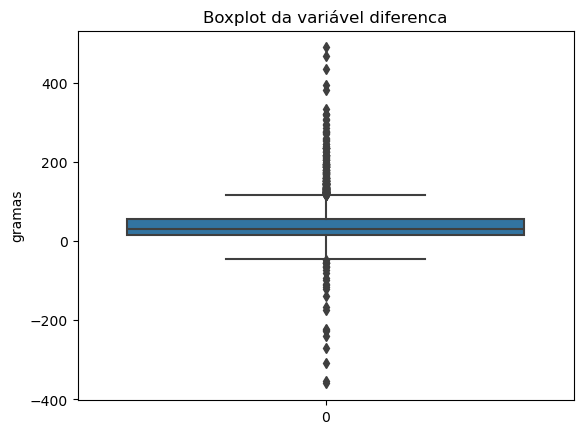

In [15]:
# Visualizando boxplot da variavel diferença
ax = srn.boxplot(data=df2["diferenca"])
ax.set_title("Boxplot da variável diferenca")

# Inserindo rotulo do eixo y
ax.set(ylabel="gramas")

* O elevado número de outliers na variável diferença indica que existe um alto nível de erro na medição do peso, pois a soma das partes do carangueijo deve ser aproximadamente igual ao seu peso total.


Remoção dos outliers 

In [16]:
# Especificando a coluna referência para remover os outliers
columns_to_check = ["diferenca"]  

# Calcula o primeiro(Q1) e o terceiro(Q3) quartil 
Q1 = df2[columns_to_check].quantile(0.25)
Q3 = df2[columns_to_check].quantile(0.75)

# Calcula o intervalo interquartil
IQR = Q3 - Q1

# Defineos limites inferiores e superiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove as linhas com os outliers que encontramos
df3 = df2[~((df2[columns_to_check] < lower_bound) | (df2[columns_to_check] > upper_bound)).any(axis=1)]

df3


,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses,soma_peso_partes,diferenca
0,F,43.815,35.814,12.573,698.422534,349.613121,158.330540,191.282581,9,699.226243,-0.803708
1,M,27.051,19.812,6.477,153.106436,65.100374,38.979854,44.203958,6,148.284186,4.822250
2,I,31.623,23.622,7.620,225.440185,91.622749,45.409520,78.361562,6,215.393831,10.046354
3,F,35.814,27.051,7.620,382.163309,134.621144,64.698520,148.686040,10,348.005705,34.157604
4,I,27.051,20.193,6.477,195.702977,98.052416,42.194687,48.222500,6,188.469602,7.233375
...,...,...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,703.646639,330.324122,165.965769,180.834373,8,677.124264,26.522375
3889,F,47.244,36.957,13.335,976.907469,438.021037,203.338206,277.279372,10,918.638615,58.268854
3890,I,19.050,14.097,4.953,57.063291,21.700125,14.868604,18.083437,5,54.652166,2.411125
3891,I,32.385,23.622,8.001,293.353539,127.789624,66.305937,84.389374,6,278.484935,14.868604


[Text(0, 0.5, 'gramas')]

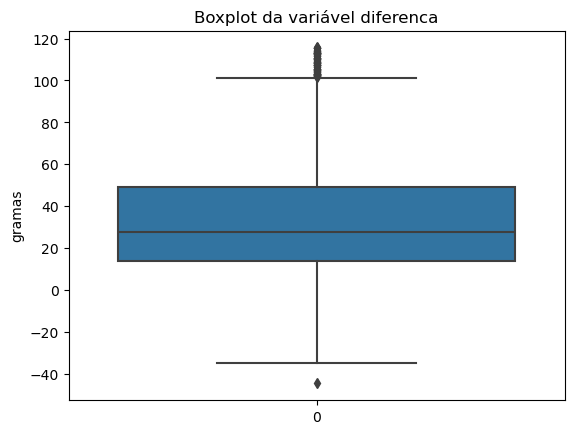

In [17]:
# Visualizando boxplot da variavel diferenca apos remover outliers
ax = srn.boxplot(data=df3["diferenca"])
ax.set_title("Boxplot da variável diferenca")

# Inserindo rotulo do eixo y
ax.set(ylabel="gramas")

* A diferença de medição do peso total diminuiu consideravelmente

In [18]:
# Removendo as colunas que criamos
df3.drop(columns=["soma_peso_partes", "diferenca"], inplace=True)
df3

C:\Users\Gustavo Cearito\AppData\Local\Temp\ipykernel_21556\3625009538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(columns=["soma_peso_partes", "diferenca"], inplace=True)


,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
0,F,43.815,35.814,12.573,698.422534,349.613121,158.330540,191.282581,9
1,M,27.051,19.812,6.477,153.106436,65.100374,38.979854,44.203958,6
2,I,31.623,23.622,7.620,225.440185,91.622749,45.409520,78.361562,6
3,F,35.814,27.051,7.620,382.163309,134.621144,64.698520,148.686040,10
4,I,27.051,20.193,6.477,195.702977,98.052416,42.194687,48.222500,6
...,...,...,...,...,...,...,...,...,...
3888,F,44.577,34.671,9.906,703.646639,330.324122,165.965769,180.834373,8
3889,F,47.244,36.957,13.335,976.907469,438.021037,203.338206,277.279372,10
3890,I,19.050,14.097,4.953,57.063291,21.700125,14.868604,18.083437,5
3891,I,32.385,23.622,8.001,293.353539,127.789624,66.305937,84.389374,6


Visualização das estatísticas descritivas após os tratamentos

In [19]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
comprimento_cm,3647.0,39.407226,9.025534,5.715000,33.909000,40.767000,46.101000,59.436000
diametro_cm,3647.0,30.645793,7.441748,4.191000,26.289000,32.004000,36.195000,48.006000
altura_cm,3647.0,10.460628,3.140923,0.762000,8.382000,10.668000,12.573000,86.106000
peso_gramas,3647.0,634.121130,368.713418,1.607417,345.996434,618.051702,892.919949,2233.907289
peso_descascado_gramas,3647.0,277.792516,171.965289,0.803708,142.658228,257.588518,391.004100,1195.917988
peso_visceral_gramas,3647.0,139.212772,84.175666,0.401854,72.333749,131.406311,195.702977,610.818327
peso_casca_gramas,3647.0,183.055424,104.125362,1.205562,100.463541,179.226956,253.168122,807.726867
idade_meses,3647.0,9.716479,2.996379,1.000000,8.000000,9.000000,11.000000,26.000000


### Análise exploratória das variáveis

#### Sexo 
Verificação para identificar a presença de dados que se encontrem fora do domínio estabelecido para a variável

In [20]:
# Agrupa os dados pelas categoris do sexo
agrupado = df3.groupby(["sexo"]).size()

agrupado


sexo
F    1109
I    1211
M    1327
dtype: int64

* Não há valores fora do domínio estabelecido para o sexo 

Visualização da quantidade e percentual de cada sexo na amostra

In [21]:
# Calcula a soma das séries "M", "F" e "I"
s_total = agrupado['M'] + agrupado['F'] + agrupado['I']

# Adiciona a série "total" ao objeto agregado
agrupado['Total'] = s_total

agrupadotabela = pd.DataFrame(agrupado).reset_index().rename(columns={0: "quantidade" , "sexo": "grupo" })
# Cria a coluna do percentual
agrupadotabela['% do total'] = agrupadotabela["quantidade"] / s_total * 100

agrupadotabela

,grupo,quantidade,% do total
0,F,1109,30.408555
1,I,1211,33.205374
2,M,1327,36.386071
3,Total,3647,100.000000


A distribuição dos carangueijos por sexo na amostra é: 
* 30,41% feminino
* 33,20% indeterminado
* 36,39% masculino

#### Variáveis de tamanho


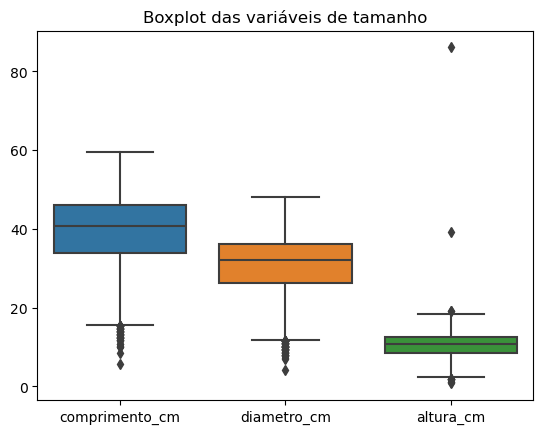

In [22]:
# Criando o boxplot das variáveis de tamanho
ax = srn.boxplot(data=df3[["comprimento_cm", "diametro_cm", "altura_cm"]])

# Define o título do gráfico
ax.set_title("Boxplot das variáveis de tamanho")
# Exibe o gráfico
plt.show()

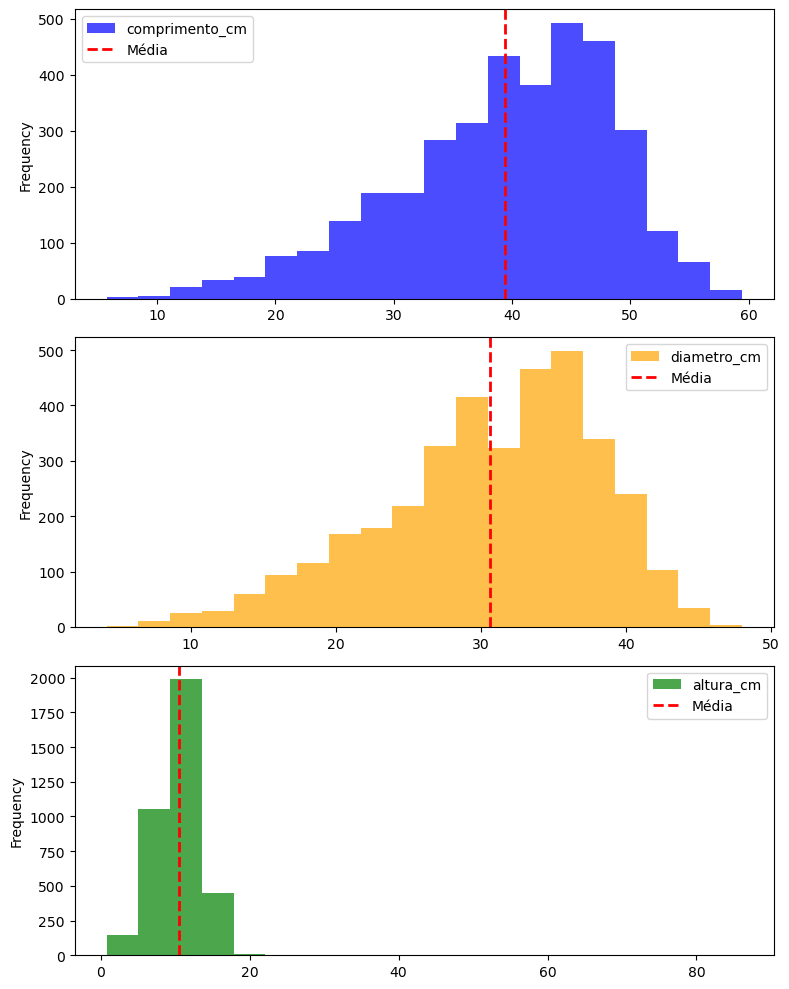

In [23]:
# Cria uma figura e três subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

# Plota o histograma para cada variável
df3['comprimento_cm'].plot.hist(ax=axs[0], bins=20, color='blue', alpha=0.7)
axs[0].axvline(df3['comprimento_cm'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

df3['diametro_cm'].plot.hist(ax=axs[1], bins=20, color='orange', alpha=0.7)
axs[1].axvline(df3['diametro_cm'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

df3['altura_cm'].plot.hist(ax=axs[2], bins=20, color='green', alpha=0.7)
axs[2].axvline(df3['altura_cm'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

# Adiciona legendas
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

Através dos boxplots e dos histogramas das variáveis de tamanho, podemos concluir que: 
* A variável comprimento possui outliers na região abaixo do primeiro quartil. Além disto apresenta uma distribuição assimétrica. 
* A variável diâmetro também possui outliers na região abaixo do primeiro quartil e distribuição assimétrica.
* A variável altura possui outliers tanto abaixo do primeiro quartil quanto acima do terceiro, enquanto sua distribuição é aproximadamente simétrica. 

#### Variáveis de peso


[Text(0, 0, 'peso_gramas'),
 Text(1, 0, 'peso_descascado_gramas'),
 Text(2, 0, 'peso_visceral_gramas'),
 Text(3, 0, 'peso_casca_gramas')]

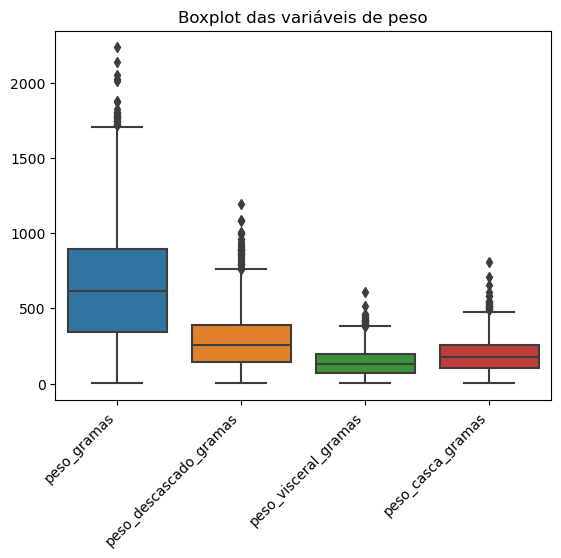

In [24]:
# Visualizando boxplot das varáveis de peso
ax = srn.boxplot(data=df3[["peso_gramas", "peso_descascado_gramas", "peso_visceral_gramas", "peso_casca_gramas"]])
ax.set_title("Boxplot das variáveis de peso")

# Rotaciona o título dos rótulos no eixo x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')



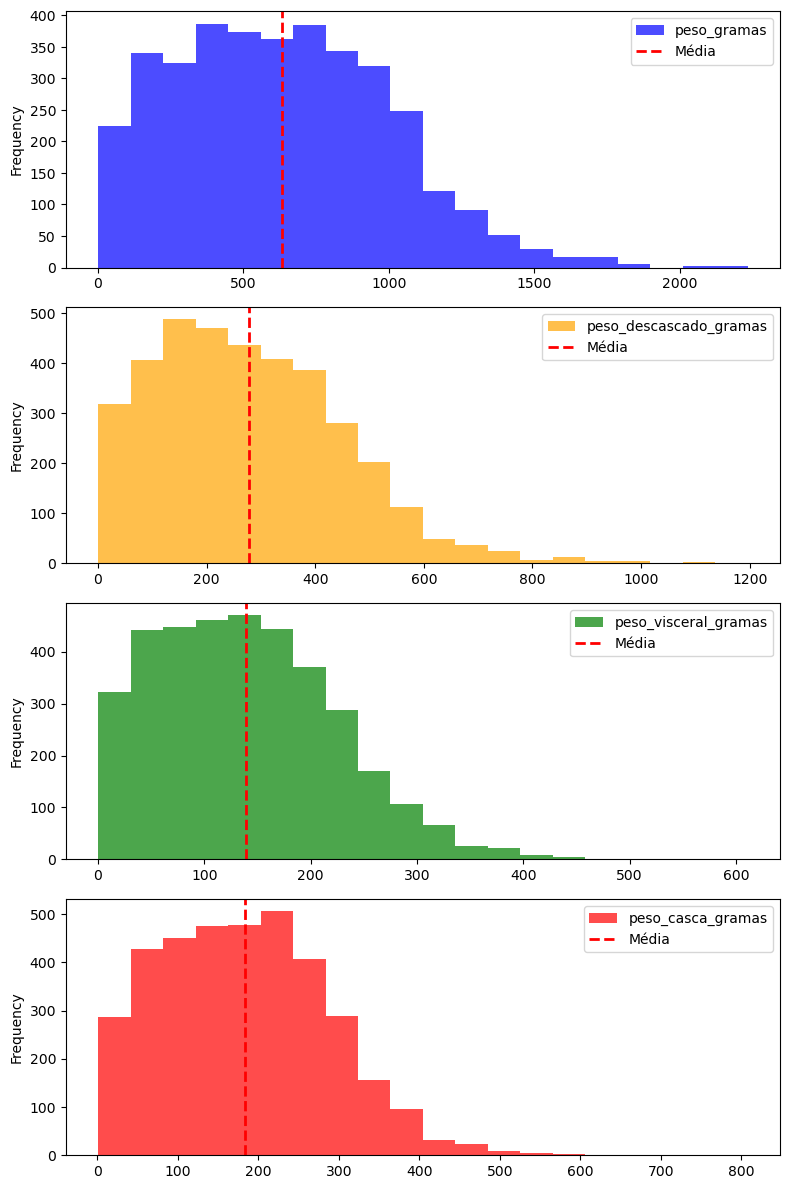

In [25]:
# Define o tamanho da figura e os subplots
fig, axs = plt.subplots(4, 1, figsize=(8, 12))

# Plota o histograma para cada variável e adiciona as linhas para a média
df3['peso_gramas'].plot.hist(ax=axs[0], bins=20, color='blue', alpha=0.7)
axs[0].axvline(df3['peso_gramas'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

df3['peso_descascado_gramas'].plot.hist(ax=axs[1], bins=20, color='orange', alpha=0.7)
axs[1].axvline(df3['peso_descascado_gramas'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

df3['peso_visceral_gramas'].plot.hist(ax=axs[2], bins=20, color='green', alpha=0.7)
axs[2].axvline(df3['peso_visceral_gramas'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

df3['peso_casca_gramas'].plot.hist(ax=axs[3], bins=20, color='red', alpha=0.7)
axs[3].axvline(df3['peso_casca_gramas'].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')

# Adiciona legendas
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()

# Ajusta o layout
plt.tight_layout()

# Exibe o gráfico
plt.show()

Através dos boxplots e dos histogramas das variáveis de peso, podemos concluir que:
* Todas possuem outliers acima do terceiro quartil e apresentam distribuições não uniformes 

#### Peso descascado
Busca-se observar os carangueijos com maior peso descascado possível

In [26]:
# Calculando o terceiro quartil 
terceiroq = df3["peso_descascado_gramas"].quantile(0.75)

# Ordenando o dataframe 
sorted_df = df3.sort_values(by = 'peso_descascado_gramas')
sorted_df

# Filtrando as linhas correspondentes do terceiro quartil para cima
third_quartile_rows = sorted_df[sorted_df["peso_descascado_gramas"] >= terceiroq]
third_quartile_rows

,sexo,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
1238,I,45.339,36.195,11.811,790.848992,391.004100,147.882332,221.421644,10
1420,M,45.720,35.814,13.335,888.097699,391.004100,198.515956,253.168122,15
16,M,48.768,40.005,13.716,1055.670885,391.004100,240.710643,327.511142,10
2893,M,47.625,36.576,13.335,855.949366,391.004100,208.160456,229.056873,10
2595,F,48.768,36.195,13.335,927.881261,391.004100,274.064539,231.467998,9
...,...,...,...,...,...,...,...,...,...
1293,M,54.102,42.291,13.335,1719.935815,1001.018719,299.381351,348.809413,11
2316,M,55.245,43.434,14.478,1873.042251,1007.046531,434.806204,417.928329,9
772,M,59.055,48.006,19.050,2233.907289,1083.800676,610.818327,464.543412,12
1949,M,55.245,43.815,18.288,1776.195398,1085.809947,331.931538,403.059725,13


Estatísticas descritivas dos carangueijos com maior peso descascado (maior ou igual a Q3)

In [27]:
third_quartile_rows.describe()

,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
count,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000,916.000000
mean,48.958500,38.472681,13.310044,1109.323680,508.193723,243.206877,302.789653,10.826419
std,3.341695,2.815519,1.789535,224.942938,113.782213,59.321545,74.340586,2.248837
min,38.100000,27.813000,1.143000,732.981992,391.004100,127.789624,141.452665,6.000000
25%,46.863000,36.576000,12.192000,952.896683,427.070511,201.328935,253.067659,9.000000
50%,48.768000,38.481000,13.335000,1058.082010,477.402745,235.486539,289.535924,10.000000
75%,51.054000,40.005000,14.478000,1221.837581,549.736494,275.772419,342.982528,11.000000
max,59.436000,48.006000,39.243000,2233.907289,1195.917988,610.818327,807.726867,21.000000


Distribuição do sexo dos carangueijos com maior peso descascado

In [28]:
third_quartile_rows.groupby(["sexo"]).size()

sexo
F    410
I     30
M    476
dtype: int64

* É possível perceber que os carangueijos de sexo indeterminado são a minoria entre os que possuem maior peso descascado, enquanto a categoria masculino é uma leve maioria

In [29]:
third_quartile_rows.groupby(["sexo"]).mean()

,comprimento_cm,diametro_cm,altura_cm,peso_gramas,peso_descascado_gramas,peso_visceral_gramas,peso_casca_gramas,idade_meses
sexo,,,,,,,,
F,49.155505,38.704024,13.384251,1119.809750,504.206418,247.893051,310.605824,10.880488
I,46.723300,36.410900,12.433300,943.875057,442.816497,195.193962,259.102169,11.633333
M,48.929685,38.403359,13.301382,1110.718996,515.748581,242.196491,298.810651,10.728992


* Entre os carangueijos com maior peso descascado, as médias das variáveis comprimento, diametro, altura e idade são muito parecidas, independente do sexo (M, F ou I).
* Quanto as variáveis de peso, o sexo indeterminado possui em média valores menores que as outras duas categorias. Enquanto que não parece haver diferenças significativas no peso descascado (e nos demais) entre o sexo masculino e feminino. 

#### Idade
Distribuição da quantidade de carangueijos por idade

In [30]:
age_group = df3.groupby("idade_meses").size()
age_group = pd.DataFrame(age_group).reset_index()
age_group.columns = ["idade_meses", "frequencia"]
age_group

,idade_meses,frequencia
0,1,1
1,2,1
2,3,13
3,4,53
4,5,105
5,6,239
6,7,352
7,8,507
8,9,630
9,10,568


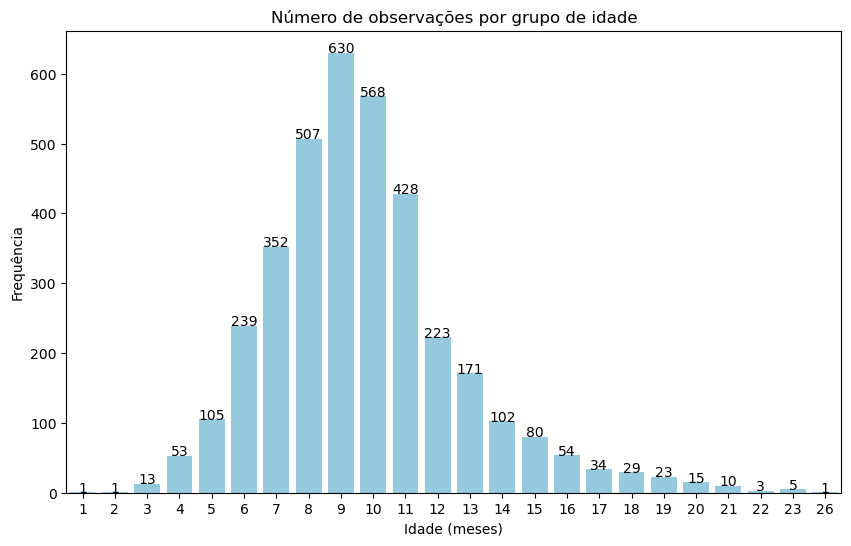

In [31]:
# Cria o barplot
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
srn.barplot(x='idade_meses', y='frequencia', data=age_group, color='skyblue')

# Adiciona os valores exatos de cada coluna
for index, row in age_group.iterrows():
    plt.text(row.name, row.frequencia, str(row.frequencia), color='black', ha="center")

plt.title('Número de observações por grupo de idade')
plt.xlabel('Idade (meses)')
plt.ylabel('Frequência')
plt.show()

* A distribuição da quantidade de carangueijos por grupo de idade possui uma distribuição aproximadamente normal. 


Será possível afirmar que após uma certa idade os carangueijos deixam de aumentar seu peso descascado? 

Cálculo da média do peso descascado de cada grupo

In [32]:
# Selecionando as variáveis que desejamos para o dataset
idadexpeso = df3[["idade_meses", "peso_descascado_gramas"]]
# Ordenando pela idade
idadexpeso.sort_values(by = "idade_meses")
# Agrupando por idade para calcular a média de cada grupo
idadexpeso = idadexpeso.groupby("idade_meses").mean().reset_index()
idadexpeso.columns = ["idade", "media peso descascado por idade"]
idadexpeso

,idade,media peso descascado por idade
0,1,0.803708
1,2,3.616687
2,3,9.953618
3,4,20.047215
4,5,43.109384
5,6,99.264704
6,7,146.433602
7,8,238.219465
8,9,308.384160
9,10,353.205047


Cálculo da variação (entre cada grupo idade) da média do peso descascado

In [33]:
# Inserindo a coluna frequencia
idadexpeso["frequencia"] = age_group["frequencia"]
# Calculando a variação percentual
idadexpeso["variacao por idade"] = idadexpeso['media peso descascado por idade'].pct_change()* 100
idadexpeso


,idade,media peso descascado por idade,frequencia,variacao por idade
0,1,0.803708,1,NaN
1,2,3.616687,1,350.000000
2,3,9.953618,13,175.213675
3,4,20.047215,53,101.406305
4,5,43.109384,105,115.039262
5,6,99.264704,239,130.262405
6,7,146.433602,352,47.518298
7,8,238.219465,507,62.680875
8,9,308.384160,630,29.453805
9,10,353.205047,568,14.534108


* A partir dos 11 meses de idade, a média de peso descascado por grupo de idade passa a apresentar variações negativas

### Conclusões: 
Com base na análise exploratória do dataset contendo características físicas de caranguejos de Boston, podemos extrair várias conclusões importantes. Primeiramente, observamos que as variáveis de peso exibem um alto desvio padrão, indicando uma grande dispersão dos dados. Além disso, a maioria dos caranguejos na amostra tem no máximo 11 meses de idade, destacando uma tendência de distribuição temporal. Notavelmente, há inconsistências na medição do peso, evidenciadas pela diferença entre o peso total e a soma das partes separadas. Em relação ao sexo dos caranguejos, o grupo masculino prevalece ligeiramente entre os que possuem maior peso descascado, enquanto os de sexo indeterminado são minoria nesse grupo. No entanto, as médias das variáveis físicas (comprimento, diâmetro, altura e idade) entre os caranguejos com maior peso descascado são bastante semelhantes, independentemente do sexo. Quanto ao peso, o sexo indeterminado tende a ter valores menores em média. Surpreendentemente, não parecem haver diferenças significativas entre os sexos masculino e feminino. A distribuição da quantidade de carangueijos por grupo de idade assemelha-se a uma distribuição normal, mas a média de peso descascado apresenta variações negativas após os 11 meses de idade, indicando uma possível tendência de perda de peso com o tempo. Essas conclusões fornecem insights valiosos para entender as características dos caranguejos de Boston e suas relações com o peso descascado, aspecto crucial em sua comercialização.
